## 1. Load and Normalize `CIFAR10`

In computer-vision, CIFAR-10  is an established benchmark dataset used object recognition. It is a subset of 80 million tiny images. CIFAR-10 consists of $60,000$ $32\times32$ color images containing objects of one of 10 classes (with 6000 images per class). It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The classes represented in the dataset are:

* airplane 
* automobile 
* bird 
* cat 
* deer 
* dog 
* frog 
* horse 
* ship 
* truck

In [101]:
import torch 
import torchvision
import torchvision.transforms as transforms
import statistics

### Image Augumentation
- We have to do this job before making our model. The expectation that augmentation will prevent overfitting. This is not guaranteed and at the current stage in the class where we have not covered the topic is a dirty hack. Please treat it as such. namely - an artificial way to increase training data without relying on the unknown data generation process.

To additionally reduce the chance of overfitting, let's carry out Normalization and Regularization as below

In [102]:
# used this as a main reference: https://colab.research.google.com/drive/1myjmlnexJ0jr1qFJ6VF6Cr8mUe-drh_S?usp=sharing#scrollTo=gFiCRnYyWZ2x
# this sections code i used reference from "MNIST Datatset"
# https://pytorch.org/vision/stable/transforms.html
# https://stackoverflow.com/questions/65467621/what-are-the-numbers-in-torch-transforms-normalize-and-how-to-select-them
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.1307],[0.3081])])

In [103]:
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root=r"\\wsl.localhost\Ubuntu\home\amrita82200\Assignment-3\Assignment-3\CODE_PROBLEM\undergrad_code\cifar-10-python.tar\cifar-10-python", train=True,download=False, transform=transform) #gets cifar data and puts it in var to use later(cifar data is not local. I went to "C:\Users\amrit\anaconda3\Lib\site-packages\torchvision\datasets\cifar.py" to see the file and saw that.)
#https://blog.paperspace.com/dataloaders-abstractions-pytorch/
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)

testset = torchvision.datasets.CIFAR10(root=r"\\wsl.localhost\Ubuntu\home\amrita82200\Assignment-3\Assignment-3\CODE_PROBLEM\undergrad_code\cifar-10-python.tar\cifar-10-python", train=False,download=False, transform=transform) 
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

###okok so full transparancy, the code kept making my kernel in jupyter in anaconda die. and i spent so long trying to figure out why omg
##so after that fiasco, i switched to vs code and i use the ubuntu to load it so that is why the root location is different from the code and comment


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


immediate
immediate2
immediate3
immediate4
numpy b4
numpy after
this line


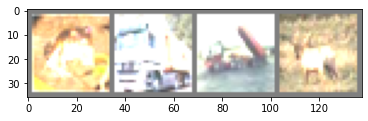

or this one
immediate5
 frog truck truck  deer
immediate6


In [104]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
print("immediate")

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("numpy b4")
    npimg = img.numpy()
    print("numpy after")
    plt.imshow(np.transpose(npimg, (1, 2,0)))#!!!!!!!!!!!!!found the problem line the 
    #that line made the kernel in jupyter break idk why but it took hours and hours to figure out so i gave up and switched to vs code
    print("this line")
    plt.show()
    print("or this one")
    

# get some random training images
print("immediate2")
dataiter = iter(trainloader)
print("immediate3")
images, labels = dataiter.next()
print("immediate4")
# show images
#kernel kept dying OMG so used print statement debugging to see which statement was breaking everything. 
imshow(torchvision.utils.make_grid(images)) #immediate 5 did not print, so the problem was here
print("immediate5")
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print("immediate6")

## 2. Define a Convolution Neural Network

In [105]:
import torch.nn as nn
import torch.nn.functional as F

#https://colab.research.google.com/drive/1myjmlnexJ0jr1qFJ6VF6Cr8mUe-drh_S?usp=sharing#scrollTo=MF10VSf-ZvcC
#following the steps in this notebook to create the BasicCNN
#CIFAR-10 consists of 60,000 32 X 32 color images containing objects of one of 10 classes (with 6000 images per class).
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        ######### YOUR CODE HERE #########
        self.conv1 = nn.Conv2d(32, 32, 3, stride=1, padding=0)#torch.nn.Conv2d(num_in_channels=32, num_out_channels=32, kernel_size=3 for RGB)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(64, 64, 3, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(2)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(3*3*64, 64, bias=True)
        self.fc2 = nn.Linear(64, 10)
        
        
        
        ######### END YOUR CODE #########

    def forward(self, X):
        ######### YOUR CODE HERE #########
         x = F.relu(self.conv1(X))
         return x
net = Net()

## 3. Define a loss function and optimizer

In [106]:
#using classification cross-entropy loss and SGD with momentum
import torch.optim as optim
#https://colab.research.google.com/drive/18jvTW_gUj0H7QLscLBI8ZdWGfbwPmNcO?usp=sharing#scrollTo=jMjkHh6JOcPj
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.02) #in notebook, model --> cnn bc cnn has parameters
cuda = torch.device('cuda')


## 4.Train the Network 

In [107]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)

def train(net, loss_fn, optimizer):
    
    #set the module in training mode
    net.train()
    
    train_batch_losses = []
    
    for batch, labels in trainloader:
        
        #send the training data to the GPU
        batch = batch.to(cuda)
        labels = labels.to(cuda)
        
        #set all gradients to zero
        optimizer.zero_grad()
        
        #forward propagate
        y_pred = net(batch)
        
        #calculate the loss
        loss = loss_fn(y_pred, labels)
        
        #bachpropagate
        loss.backward()
        
        #update the parameters (weights and biases)
        optimizer.step()
        
        train_batch_losses.append(float(loss))
        
    mean_loss = statistics.mean(train_batch_losses)
    print(mean_loss)
        
    return mean_loss




"""
so i could not figure out the bottom code, so after a long time i used the code that we did in class as seen above.
but i had time at the end and was looking for how to make the template given work. The only place else in the code that has loss explicity is criterion = nn.CrossEntropyLoss()
I remember we talked about it in class, but i went and looked at resources too: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
I made criterion and optimizer above and then never used them -_- so that made me thik that i should use them
https://nn.readthedocs.io/en/latest/criterion/index.html --> "Criterions are helpful to train a neural network. Given an input and a target, they compute a gradient according to a given loss function."
I should make sure i use all the variables i create in the future. time ran out from me, but i still wanted to explain my thoughts and show all the work i tried. :)

#looping over our data iterator and feed the inputs to the network and optimize
#https://colab.research.google.com/drive/1myjmlnexJ0jr1qFJ6VF6Cr8mUe-drh_S?usp=sharing#scrollTo=hycybwJOsrIO
iteration = 10
for epoch in range(1,11):  # loop over the dataset multiple times

    running_loss = 0.0
        ######### YOUR CODE HERE #########
        
        
        
        ######### END YOUR CODE #########
        # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finished Training')

"""

'\nso i could not figure out the bottom code, so after a long time i used the code that we did in class as seen above.\nbut i had time at the end and was looking for how to make the template given work. The only place else in the code that has loss explicity is criterion = nn.CrossEntropyLoss()\nI remember we talked about it in class, but i went and looked at resources too: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html\nI made criterion and optimizer above and then never used them -_- so that made me thik that i should use them\nhttps://nn.readthedocs.io/en/latest/criterion/index.html --> "Criterions are helpful to train a neural network. Given an input and a target, they compute a gradient according to a given loss function."\nI should make sure i use all the variables i create in the future. time ran out from me, but i still wanted to explain my thoughts and show all the work i tried. :)\n\n#looping over our data iterator and feed the inputs to the network 

#### Saving our `model` 

In [108]:
#https://www.tensorflow.org/tutorials/keras/save_and_load --> path is just a string varible that holds the location of where we are saving (kinda like root?)

PATH = r"D:\Assignment-3\Assignment-3\CODE_PROBLEM\undergrad_code"
###### SAVE YOUR MODEL #########
#initial research showed other imports, but we never used them in class. There is nothing in the jupyter class nbs that shows how to do this the exact way
#i searched how to save cnn using the imports used in this hw and found this: https://www.codegrepper.com/code-examples/python/what+is+PATH+in+torch.save%28model.state_dict%28%29%2C+PATH%29
#so i will use this, but change model to net

torch.save(net,PATH)

#this does not appear to work, but im not getting an error, so im going to leave it
###### END YOUR CODE #########

## 5. Test the Network on the test data

After training the network for 2 passes over the training dataset 
We will now predict the class label that the neural network outputs to check 
if the network has learnt anything. 
Now, displaying the images from the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


numpy b4
numpy after
this line


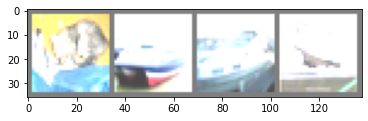

or this one
GroundTruth:    cat  ship  ship plane


In [109]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [110]:
net = Net()
net.load_state_dict(torch.load(PATH))

AttributeError: 'Net' object has no attribute 'copy'

What NN thinks of the above images

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   car  ship plane


#### Performance of the model on the `whole dataset`

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


#### Checking the particular class performance 

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))



#ok so my accuracy is not great, and i have an attribute error(?) . However, first time i finished the code with some output at the end :D

Accuracy for class plane is: 65.5 %
Accuracy for class car   is: 82.4 %
Accuracy for class bird  is: 48.8 %
Accuracy for class cat   is: 35.3 %
Accuracy for class deer  is: 53.6 %
Accuracy for class dog   is: 41.0 %
Accuracy for class frog  is: 77.2 %
Accuracy for class horse is: 75.2 %
Accuracy for class ship  is: 72.6 %
Accuracy for class truck is: 63.8 %
